# A Naive Implementation

1. Generate a random number within the desired range and check if it is unique and if it is then add it to the results.
2. Repeat until the desired number of results have been generated

In [1]:
import random
from typing import Generator

def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")
    
    unique_numbers = set()

    while len(unique_numbers) < batch_size:
        number = random.randint(min_num, max_num)
        if number not in unique_numbers:
            unique_numbers.add(number)
            yield number

In [2]:
list(generate_unique_random_numbers(0, 9, 3))

[8, 6, 9]

## Distribution

We can run it multiple times and plot the results to convince ourselves that it is evenly distributed.

Chi-Square Statistic: 8.013333333333334
P-Value: 0.53280309670043


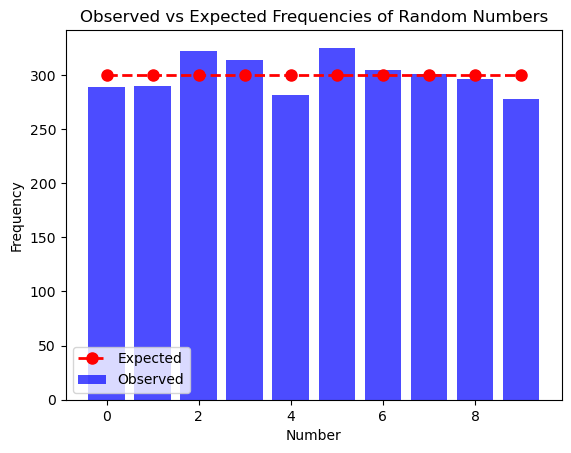

In [3]:
import run

run.plot(generate_unique_random_numbers, 0, 9, 3, 1000)

## Execution Time

The downside to this implementation is that the runtime is non-deterministic and gets very bad as the batch size approaches the range size (i.e. batch percentage).

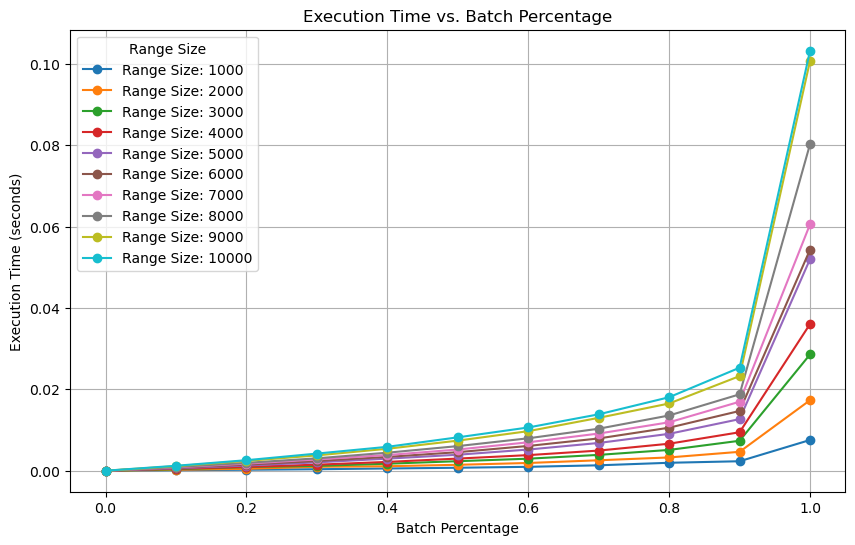

In [4]:
import plot

df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size))
plot.execution_time(df)